Number of apps after filtering: 889


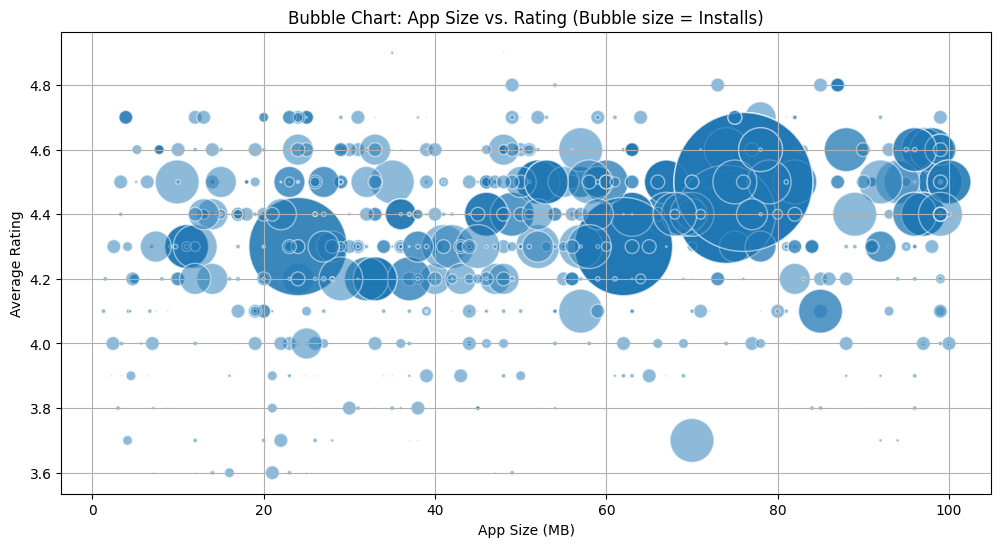

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
import os


data_file_path = 'Play Store Data.csv'


if not os.path.exists(data_file_path):
    raise FileNotFoundError(f"Dataset not found at {data_file_path}. Please check the file path.")


play_store_data = pd.read_csv(data_file_path)


play_store_data = play_store_data.dropna(subset=['Rating', 'Size', 'Installs', 'Category'])


def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'K' in size:
            return float(size.replace('K', '')) / 1000  # Convert KB to MB
    return None

play_store_data['Size'] = play_store_data['Size'].apply(convert_size)


play_store_data = play_store_data[play_store_data['Installs'].str.replace('[+,]', '', regex=True).str.isnumeric()]
play_store_data['Installs'] = play_store_data['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(float)


play_store_data['Category'] = play_store_data['Category'].str.strip().str.lower()


filtered_data = play_store_data[
    (play_store_data['Rating'] > 3.5) &
    (play_store_data['Category'].str.contains('game', case=False, na=False)) &
    (play_store_data['Installs'] > 50000)
]


if filtered_data.empty:
    print("No data available after filtering. Please check dataset conditions.")
else:
    print(f"Number of apps after filtering: {len(filtered_data)}")


ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist).time()
start_time = datetime.time(17, 0, 0)
end_time = datetime.time(19, 0, 0)

if start_time <= current_time <= end_time and not filtered_data.empty:

    plt.figure(figsize=(12, 6))
    
    plt.scatter(
        filtered_data['Size'], 
        filtered_data['Rating'], 
        s=filtered_data['Installs'] / 1e5,  # Scale bubble size
        alpha=0.5, 
        edgecolors='w'
    )
    
    plt.xlabel('App Size (MB)')
    plt.ylabel('Average Rating')
    plt.title('Bubble Chart: App Size vs. Rating (Bubble size = Installs)')
    plt.grid(True)
    plt.show()
else:
    print('Graph is only available between 5 PM IST and 7 PM IST, or no data available.')
